In [26]:
# # Heart Desease Prediction
# Data Gathering
# Data Preperation
# Data Preprocessing
# Data Transformation
# Model Bulding
# Model Evaluation 
# Predicion

In [27]:
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [28]:
import pandas as pd
import numpy as np
# import matplotlib as plt
import matplotlib.pyplot as plt

import seaborn as sns

In [29]:
df = pd.read_csv('HeartDisease.csv')

In [30]:
df.tail(7)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [31]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Histogram')

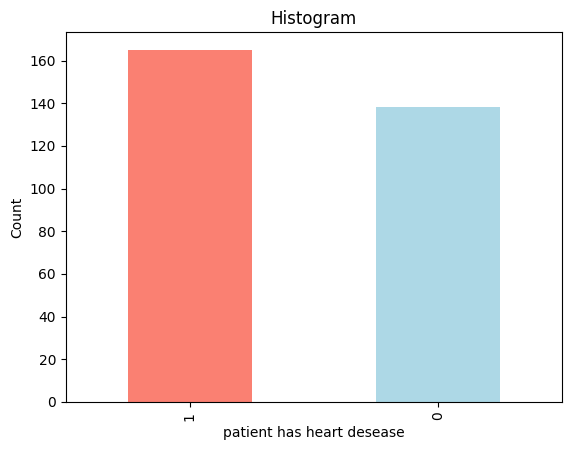

In [32]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.xlabel('patient has heart desease')
plt.ylabel('Count')
plt.title('Histogram')

In [33]:
# Checkig the null values
df.isna().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [34]:
# Idetifying the catagorical values
categorical_val = []
continious_val = []

for column in df.columns:
    print("----------------------------------")
    print(f"{column}:{df[column].unique()}")
    if len(df[column].unique())<=10:
        categorical_val.append(column)
    else:
        continious_val.append(column)

----------------------------------
age:[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
----------------------------------
gender:[1 0]
----------------------------------
chest_pain:[3 2 1 0]
----------------------------------
rest_bps:[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
----------------------------------
cholestrol:[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 20

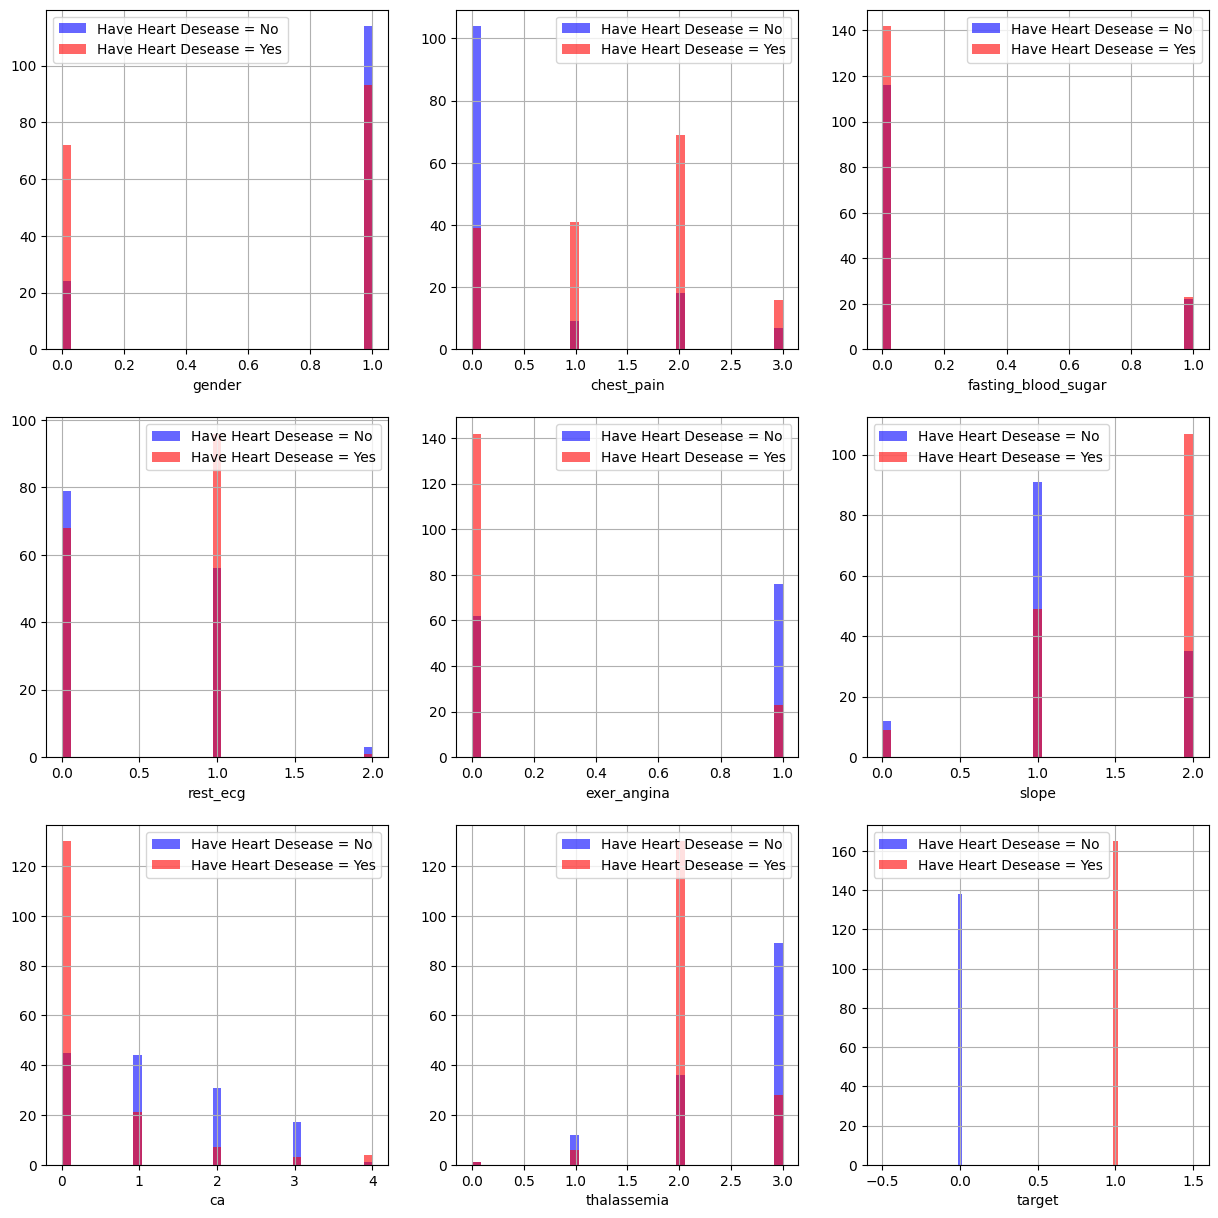

In [35]:
plt.figure(figsize=(15,15))

for i, column in enumerate(categorical_val,1):
    plt.subplot(3,3,i)
    df[df['target'] ==0][column].hist(bins =35, color='blue', label = 'Have Heart Desease = No' , alpha = 0.6)
    df[df['target'] ==1][column].hist(bins =35, color='red', label = 'Have Heart Desease = Yes', alpha = 0.6)
    plt.legend()
    plt.xlabel(column)

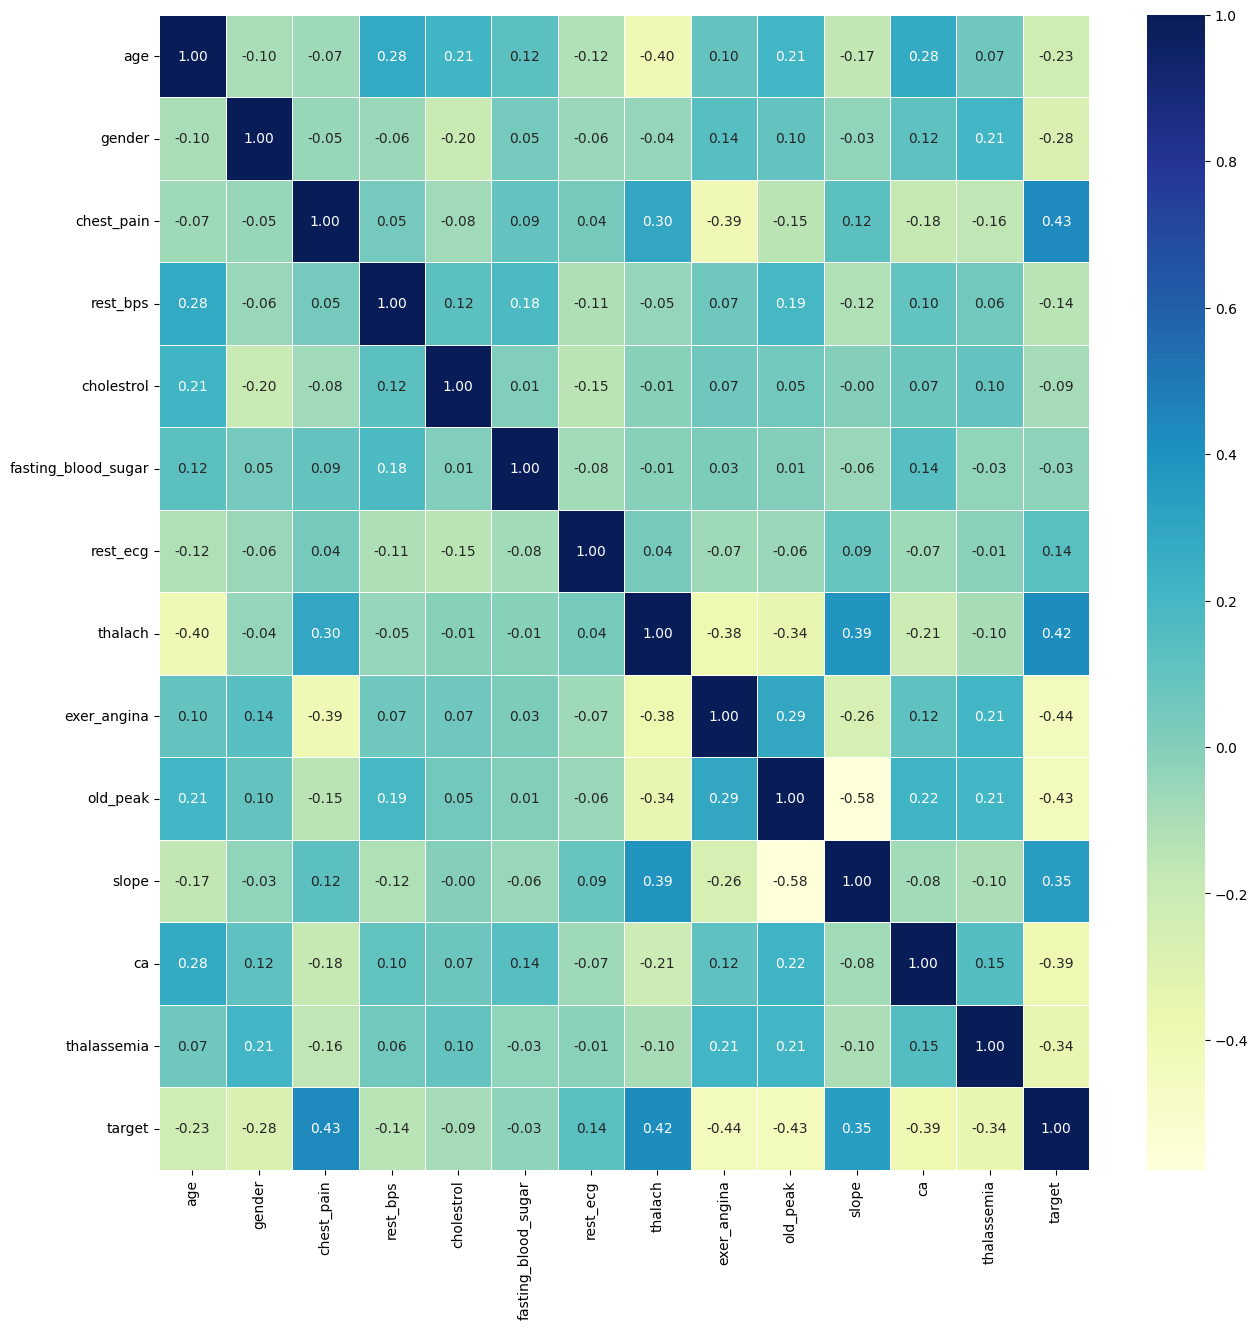

In [36]:
# Plotting Correlation Matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix,
                 annot =True, 
                 linewidths=0.5, 
                 fmt='.2f',
                 cmap='YlGnBu');
# bottom, top = ax.get.ylim()
# ax.set_ylim(bottom +0.5, top-0.5)

<Axes: title={'center': 'Corr with targer'}>

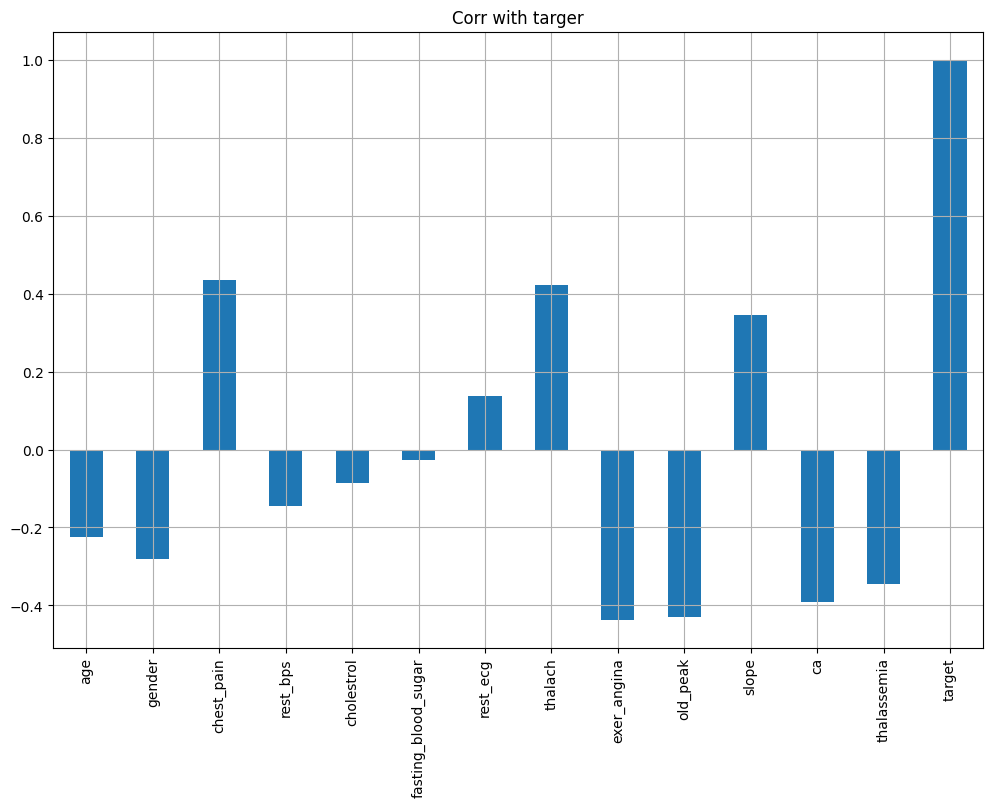

In [37]:
df.corrwith(df.target).plot(kind = 'bar', grid = True, figsize = (12,8), title= 'Corr with targer')

In [38]:
# Data Preprocessing
target_var = df['target']
independent_features = df.drop(columns=['target'])

In [39]:
# One hot encodeing
df = pd.get_dummies(independent_features,columns= ['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia'])

In [40]:
# Scaling
from sklearn.preprocessing import StandardScaler


In [41]:
sc = StandardScaler()
col_to_scale = ['age', 'rest_bps','cholestrol','thalach','old_peak']
df[col_to_scale] = sc.fit_transform(df[col_to_scale])

In [42]:

from sklearn.model_selection import train_test_split

X = df
y = target_var

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [43]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))      
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [44]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [45]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Accuracy Score: 87.60%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.883495    0.870504  0.876033    0.876999      0.876355
recall       0.834862    0.909774  0.876033    0.872318      0.876033
f1-score     0.858491    0.889706  0.876033    0.874098      0.875646
support    109.000000  133.000000  0.876033  242.000000    242.000000
Confusion Matrix: 
 [[ 91  18]
 [ 12 121]]

Accuracy Score: 88.52%
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.866667   0.903226  0.885246   0.884946      0.885845
recall      0.896552   0.875000  0.885246   0.885776      0.885246
f1-score    0.881356   0.888889  0.885246   0.885122      0.885308
support    29.000000  32.000000  0.885246  61.000000     61.000000
Confusion Matrix: 
 [[26  3]
 [ 4 28]]



In [46]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

print_score(svc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svc_clf, X_train, y_train, X_test, y_test, train=False)

Accuracy Score: 92.15%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.924528    0.919118  0.921488    0.921823      0.921555
recall       0.899083    0.939850  0.921488    0.919466      0.921488
f1-score     0.911628    0.929368  0.921488    0.920498      0.921378
support    109.000000  133.000000  0.921488  242.000000    242.000000
Confusion Matrix: 
 [[ 98  11]
 [  8 125]]

Accuracy Score: 90.16%
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.870968   0.933333  0.901639   0.902151      0.903684
recall      0.931034   0.875000  0.901639   0.903017      0.901639
f1-score    0.900000   0.903226  0.901639   0.901613      0.901692
support    29.000000  32.000000  0.901639  61.000000     61.000000
Confusion Matrix: 
 [[27  2]
 [ 4 28]]



In [61]:
# Prediction Logic

new = X_train.iloc[15]
a = np.asarray(new)
a = a.reshape(1,-1)
p = svc_clf.predict(a)

C:\Users\XPS\anaconda3\python\envs\ml310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [62]:
p[0]

np.int64(1)

In [63]:
if (p[0]==1):
    print("Persone has Heart desease")
else: 
    print("Person do not have heart disease")

Persone has Heart desease
